# Une façon intéressante et moins connue de créer des graphes à l'aide de Pandas

In [1]:
from base64 import b64encode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from IPython.display import HTML

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.max_seq_items', 1)

plt.rcParams['figure.dpi'] = 150
# plt.rcParams['savefig.dpi'] = 150

In [3]:
n = 100

data = [
    ('Bitcoin',   90000*np.random.rand(n).round(2)), 
    ('Ethereum',   3000*np.random.rand(n).round(2)), 
    ('Solana',     200*np.random.rand(n).round(2)),
    ('BNB',   600*np.random.rand(n).round(2)),
    
]
df = pd.DataFrame(data, columns=['Nom crypto', 'Historique du prix'])

In [4]:
def create_line(data, figsize=(3, 0.25), **kwags):
    
    data = list(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    plt.close(fig)
    img = BytesIO()    
    
    fig.savefig(img, format='png')
    encoded = b64encode(img.getvalue()).decode('utf-8')  
    return '<img src="data:image/png;base64,{}"/>'.format(encoded)

In [5]:
from base64 import b64encode
from io import BytesIO

def create_hist(data):
    fig, ax = plt.subplots(figsize=(2, 0.5)) 
    ax.hist(data, bins=10)
    ax.axis('off')
    plt.close(fig)
    
    img = BytesIO()   # Création d'un objet Bytes (en octets)
    fig.savefig(img)   # Enregistrer l'image en un objet Bytes
    encoded = b64encode(img.getvalue())   # Encoder l'objet en tant que chaîne d'octets base64
    decoded = encoded.decode('utf-8')   # Décoder en utf-8
    return f'<img src="data:png;base64,{decoded}">'   # Renvoyer la balise HTML

,Nom crypto,Historique du prix,Prix des 7 derniers jours,Volume des échanges des 10 derniers jours
0,Bitcoin,"[62099.99999999999, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAABcSAAAXEgFnn9JSAAABXklEQVR4nO3bQRHCMBRAQcogBD8YQgKG8IOTIIBLD4Xm0V0BnUwPb34myTLGGCeAgPPeCwBYS7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyLnsvAP7d9f7c/Juvx23zbxaYsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8jwlpAP3r4xKxMWkCFYQIZgARmCBWQIFpDhlJAsp5nHY8ICMgQLyBAsIEOwgAzBAjKcEoZ945Ts6Cr/9KgnpCYsIEOwgAxbQn6istVibiYsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIyF8crVxILLzTgtmZsIAMwQIy8lvCisrWFWZmwgIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgYxljjL0XAbCGCQvIECwgQ7CADMECMgQLyBAsIEOwgIw3i2kcz1ifK+AAAAAASUVORK5CYII="">"
1,Ethereum,"[240.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAABcSAAAXEgFnn9JSAAABVElEQVR4nO3cQQ3CQBBAUUoQgh8MIQFD+MHJYqEHyvZn31Mw7eFnMmm6jTHGBSDgOnsAgL0EC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIOM2ewDO5/58zx5hl8/rMXsE/syGBWQIFpAhWECGGxYc7Iib4Kr3OxsWkCFYQIZgARmCBWQIFpAhWECGYAEZvsOCoFW/7bJhARmCBWQIFpAhWEBG/ui+8s/mKs9e4p2emw0LyBAsIEOwgIz8DavCbeT3vNP12LCADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsICMbYwxZg8BsIcNC8gQLCBDsIAMwQIyBAvIECwgQ7CAjC/zCRnLnqRdCAAAAABJRU5ErkJggg=="">"
2,Solana,"[192.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAABcSAAAXEgFnn9JSAAABWklEQVR4nO3cwQkCQRAAQU8MxHxMyBBMyHzMZA1AHz5Wz2arAjgWhGYYBrcxxjgABBz3fgDApwQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwg47T3A1Zxvt6nf/Nxu0z/JvwzExaQIVhAhmABGXZYb3xj3wQzrboTNWEBGYIFZAgWkCFYQIZgARmCBWQIFpDhDosXq9748P9MWECGYAEZggVkCBaQIVhAhmABGc4a+ImV/7LHScc8JiwgQ7CADMECMuywwlbeC5X4neYxYQEZggVkCBaQIVhAhmABGYIFZAgWkJG/w3LjAuswYQEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIZgARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZAgWkCFYQIZgARmCBWQIFpCxjTHG3o8A+IQJC8gQLCBDsIAMwQIyBAvIECwgQ7CAjCfeMhnN4VZVHAAAAABJRU5ErkJggg=="">"
3,BNB,"[240.0, ...]",,"<img src=""data:png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAABLCAYAAADK+7ojAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAABcSAAAXEgFnn9JSAAABZklEQVR4nO3c0QnCMBRA0SoO4j4u5Agu5D5uEgfQD8Fqe8k5A5SAcHl5YA5jjLEABBy3PgDApwQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwg47T1AWBPztf76t983C6rf3NWJiwgQ7CADFdCCJr16mrCAjIEC8gQLCAjv8Oa9S4PMzJhARmCBWQIFpCR32FV2LXB90xYQIZgARmuhGG/uGYui6vm2n71O83IhAVkCBaQIVhAhh0WWXZD8zFhARmCBWQIFpAhWECGYAEZggVkCBaQIVhAhmABGYIFZPhrDi+8jspembCADMECMgQLyLDDesOzJbBPJiwgQ7CADMECMgQLyBAsIEOwgAzBAjIEC8gQLCBDsIAMwQIyBAvIECwgQ7CADMECMgQLyBAsIMOLo/yFV1xZgwkLyBAsIEOwgIzDGGNsfQiAT5iwgAzBAjIEC8gQLCBDsIAMwQIyBAvIeALlYB/TZaBtqQAAAABJRU5ErkJggg=="">"

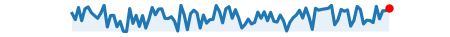
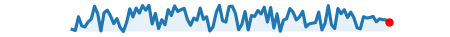
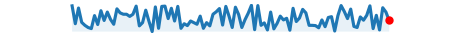
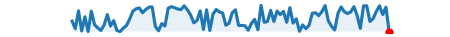

In [6]:
df['Prix des 7 derniers jours']  = df['Historique du prix'].apply(create_line)
df['Volume des échanges des 10 derniers jours'] = df['Historique du prix'].apply(create_hist)

HTML(df.to_html(escape=False))